In [42]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io as sio

In [43]:


#df_subset=sio.loadmat("/home/adun6414/gitrepo/ibeems_hybridsim/modelica_latest/Data/df_subset.mat")
#sio.savemat('test.mat',{'csv':np.zeros([1000,10])})

In [179]:

df=pd.read_csv("C:\\Users\\srg_minitower\\ibeems_data\\download\\hdc\\df_hdc_2024-02-01_2024-03-01.csv")
df.index=pd.to_datetime(df['timestamp_local'])



In [180]:
zone_id_list=['ahu9','ahu11']
for zid in zone_id_list:
    df[f'O_ahu_cv_{zid}']=df[f'O_ahu_cv_{zid}']/100
    df[f'O_ahu_hv_{zid}']=df[f'O_ahu_hv_{zid}']/100
    
    df[f'O_ahu_hcv_{zid}']=df[f'O_ahu_cv_{zid}']+df[f'O_ahu_hv_{zid}']
    df[f'i_ahu_on_{zid}']=(df[f'O_ahu_hcv_{zid}'].to_numpy()>0)*1
    #df[f'V_ahu_hcw_{zid}']=df[f'V_ahu_hcw_{zid}']#/3600
    df[f'm_ahu_hcw_{zid}']=df[f'cum_ahu_hcw_{zid}']*1000
    df[f'Q_ahu_hcwcal_{zid}']=df[f'm_ahu_hcw_{zid}']*4.184*(df[f'T_ahu_hcwr_{zid}']-df[f'T_ahu_hcws_{zid}'])*df[f'i_ahu_on_{zid}']
    df[f'P_ahu_elec_{zid}']=df[f'P_ahu_elec1_{zid}']+df[f'P_ahu_elec2_{zid}']
    # ax[1].plot(df_temp.index,df_temp[f'T_ahu_hcwr_{zone_id}'],label='T_ahu_hcwr',color='tab:red')
    # ax[1].plot(df_temp.index,df_temp[f'T_ahu_hcws_{zone_id}'],label='T_ahu_hcws',color='tab:blue')
    # ax1=ax[1].twinx()
    # ax[1].legend(loc='upper left')
    # ax1.plot(df_temp.index,df_temp[f'V_ahu_hcw_{zone_id}'],label='V_hcw',color='tab:green')


In [206]:

start_time=pd.Timestamp("2024-02-20",tz="Asia/Seoul")
end_time=start_time+pd.Timedelta("60 h")


df_temp=df[(df.index>=start_time) & (df.index<end_time)].copy()
df_temp['time']=np.arange(df_temp.shape[0])*60



In [207]:


df_temp['V_ch1_hcw']=np.clip(df_temp['V_ch1_hcw'].to_numpy(),0,np.inf)
df_temp['V_ch2_hcw']=np.clip(df_temp['V_ch2_hcw'].to_numpy(),0,np.inf)
df_temp['V_ch_hcw']=df_temp['V_ch1_hcw']+df_temp['V_ch2_hcw']
df_temp['m_ch_hcw']=df_temp['V_ch_hcw']*1000


df_temp['V_ct_hcw']=df_temp['V_ct1_hcw']+df_temp['V_ct2_hcw']
df_temp['m_ct_hcw']=df_temp['V_ct_hcw']*1000

df_temp['i_ch_on']=(df_temp['m_ch_hcw'].to_numpy()>0)*1
df_temp['i_ct_on']=(df_temp['m_ct_hcw'].to_numpy()>0)*1



i_ch_on=df_temp['i_ch_on'].to_numpy()


df_temp['P_ch_elec']=df_temp['P_ch1_elec']+df_temp['P_ch2_elec']
df_temp['P_ch_gas']=df_temp['P_ch1_gas']+df_temp['P_ch2_gas']
df_temp[f'P_pump_chw']=df_temp[f'P_pump_chw2']+df_temp[f'P_pump_chw1']
df_temp[f'P_pump_cw']=df_temp[f'P_pump_cw1']+df_temp[f'P_pump_cw2']

V_ch1_hcw_temp=df_temp['V_ch1_hcw'].to_numpy().copy()
V_ch2_hcw_temp=df_temp['V_ch2_hcw'].to_numpy().copy()
V_ch1_hcw_temp[V_ch1_hcw_temp==0]=0.1
V_ch2_hcw_temp[V_ch2_hcw_temp==0]=0.1
T_ch_hcws=(df_temp['T_ch1_hcws'].to_numpy()*V_ch1_hcw_temp+df_temp['T_ch2_hcws'].to_numpy()*V_ch2_hcw_temp)/(V_ch1_hcw_temp+V_ch2_hcw_temp)
df_temp['T_ch_hcws']=T_ch_hcws

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


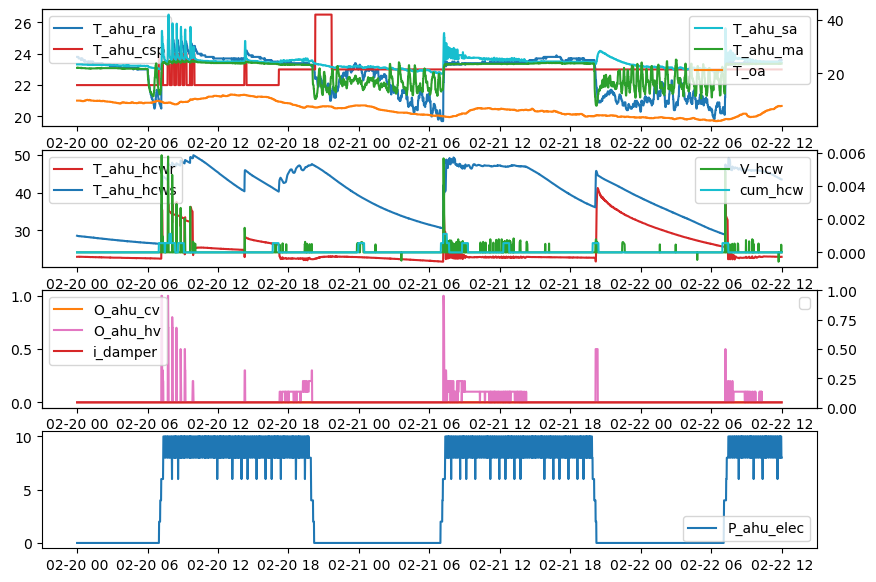

In [208]:
zone_id='ahu9'
fig,ax=plt.subplots(nrows=4,ncols=1,figsize=(10,7))
ax[0].plot(df_temp.index,df_temp[f'T_ahu_ra_{zone_id}'],label='T_ahu_ra',color='tab:blue')
ax[0].plot(df_temp.index,df_temp[f'T_ahu_sp_{zone_id}'],label='T_ahu_csp',color='tab:red')
ax0=ax[0].twinx()
ax0.plot(df_temp.index,df_temp[f'T_ahu_sa_{zone_id}'],label='T_ahu_sa',color='tab:cyan')
ax0.plot(df_temp.index,df_temp[f'T_ahu_ma_{zone_id}'],label='T_ahu_ma',color='tab:green')
ax0.plot(df_temp.index,df_temp[f'T_oa'],label='T_oa',color='tab:orange')
ax[0].legend(loc='upper left')
ax0.legend(loc="upper right")

ax[1].plot(df_temp.index,df_temp[f'T_ahu_hcwr_{zone_id}'],label='T_ahu_hcwr',color='tab:red')
ax[1].plot(df_temp.index,df_temp[f'T_ahu_hcws_{zone_id}'],label='T_ahu_hcws',color='tab:blue')
ax1=ax[1].twinx()
ax[1].legend(loc='upper left')
ax1.plot(df_temp.index,df_temp[f'V_ahu_hcw_{zone_id}'],label='V_hcw',color='tab:green')
ax1.plot(df_temp.index,df_temp[f'cum_ahu_hcw_{zone_id}'],label='cum_hcw',color='tab:cyan')
#

ax1.legend(loc='upper right')

ax[2].plot(df_temp.index,df_temp[f'O_ahu_cv_{zone_id}'],label='O_ahu_cv',color='tab:orange')
ax[2].plot(df_temp.index,df_temp[f'O_ahu_hv_{zone_id}'],label='O_ahu_hv',color='tab:pink')
#ax[2].plot(df_temp.index,df_temp[f'i_ahu_on_{zone_id}'],label='i_ahu_on',color='tab:blue')
ax[2].plot(df_temp.index,df_temp[f'i_ahu_damper_{zone_id}'],label='i_damper',color='tab:red')

ax2=ax[2].twinx()
ax[2].legend(loc='upper left')
#ax2.plot(df_temp.index,df_temp[f'Q_ahu_hcw_{zone_id}']*-1,label='Q_hcw',color='tab:olive')
#ax2.plot(df_temp.index,df_temp[f'Q_ahu_hcwcal_{zone_id}'],label='Q_hcw_cal',color='tab:cyan')
ax2.legend(loc='upper right')

ax[3].plot(df_temp.index,df_temp[f'P_ahu_elec_{zone_id}'],label='P_ahu_elec')
ax[3].legend()
#i_ahu_onoff_ahu9


# T_ahu_hcws_ahu11', 'T_ahu_hcwr_ahu11
# T_ahu_ma_ahu9, T_ahu_ra_ahu9
# O_ahu_cv_ahu9, O_ahu_hv_ahu9
# V_ahu_hcw_ahu9, T_oa, RH_oa
# T_ahu_sa_ahu9


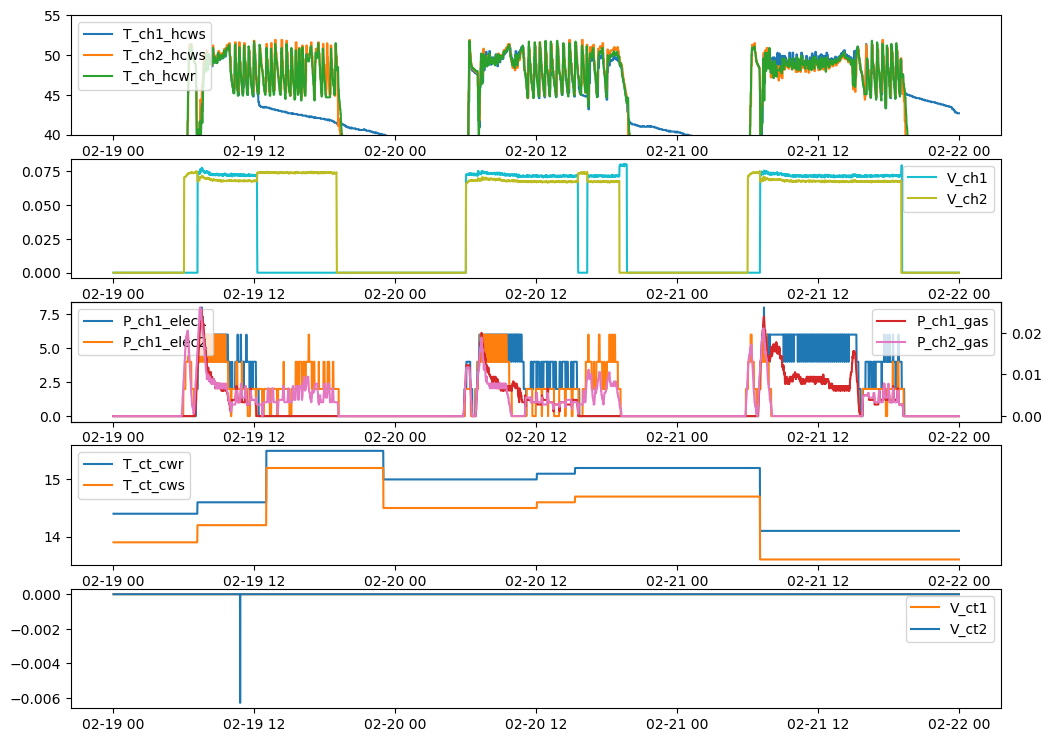

In [202]:

fig,ax=plt.subplots(nrows=5,ncols=1,figsize=(12,9))
ax[0].plot(df_temp.index,df_temp[f'T_ch1_hcws'],label='T_ch1_hcws',color='tab:blue')
ax[0].plot(df_temp.index,df_temp[f'T_ch2_hcws'],label='T_ch2_hcws',color='tab:orange')
ax[0].plot(df_temp.index,df_temp[f'T_ch_hcwr'],label='T_ch_hcwr',color='tab:green')
ax[0].set_ylim(40,55)
#ax0=ax[0].twinx()
#ax[1].plot(df_temp.index,df_temp[f'cum_ch_hcw'],label='cum_ch',color='tab:red')
#ax[1].plot(df_temp.index,df_temp[f'V_ch_hcw'],label='V_ch',color='tab:orange')
#ax[1].plot(df_temp.index,df_temp[f'cum_ch1_hcw'],label='cum_ch1',color='tab:blue')
ax[1].plot(df_temp.index,df_temp[f'V_ch1_hcw'],label='V_ch1',color='tab:cyan')
#ax[1].plot(df_temp.index,df_temp[f'cum_ch2_hcw'],label='cum_ch2',color='tab:green')
ax[1].plot(df_temp.index,df_temp[f'V_ch2_hcw'],label='V_ch2',color='tab:olive')
ax[1].legend()
ax[0].legend(loc='upper left')
#ax0.legend(loc="upper right")



ax[2].plot(df_temp.index,df_temp[f'P_ch1_elec'],label='P_ch1_elec1',color='tab:blue')
ax[2].plot(df_temp.index,df_temp[f'P_ch2_elec'],label='P_ch1_elec2',color='tab:orange')
ax2=ax[2].twinx()

ax2.plot(df_temp.index,df_temp[f'P_ch1_gas'],label='P_ch1_gas',color='tab:red')
ax2.plot(df_temp.index,df_temp[f'P_ch2_gas'],label='P_ch2_gas',color='tab:pink')
# P_ch2_gas
# P_ch2_gas.1
ax[2].legend(loc='upper left')
ax2.legend(loc="upper right")

#  'T_ct2_cwr', 'T_ct2_cws', 'i_ct2_fan1',
#       'i_ct2_fan2', 'T_ct11_cwr', 'T_ct11_cws',

ax[3].plot(df_temp.index,df_temp[f'T_ct_cwr'],label='T_ct_cwr',color='tab:blue')
ax[3].plot(df_temp.index,df_temp[f'T_ct_cws'],label='T_ct_cws',color='tab:orange')

#ax[3].plot(df_temp.index,df_temp[f'T_ct2_cws'],label='T_ct2_cws',color='tab:cyan')
#ax[3].plot(df_temp.index,df_temp[f'T_ct2_cwr'],label='T_ct2_cwr',color='tab:red')

#ax[21].plot(df_temp.index,df_temp[f'T_ch_hcwr'],label='T_ch_hcwr',color='tab:green')

#ax2=ax[2].twinx()
#ax[4].plot(df_temp.index,df_temp[f'cum_ct1_hcw'],label='V_ct1',color='tab:red')
#ax[4].plot(df_temp.index,df_temp[f'cum_ct2_hcw'],label='V_ct2',color='tab:cyan')
ax[4].plot(df_temp.index,df_temp[f'V_ct1_hcw'],label='V_ct1',color='tab:orange')
ax[4].plot(df_temp.index,df_temp[f'V_ct2_hcw'],label='V_ct2',color='tab:blue')

ax[3].legend(loc='upper left')
ax[4].legend(loc="upper right")

#  'V_ct1_hcw',
#       'v_ct1_hcw', 'cum_ct1_hcw', 'V_ct2_hcw', 'v_ct2_hcw',
#       'cum_ct2_hcw'


# ax[1].plot(df_temp.index,df_temp[f'T_ahu_hcwr_{zone_id}'],label='T_ahu_hcwr',color='tab:red')
# ax[1].plot(df_temp.index,df_temp[f'T_ahu_hcws_{zone_id}'],label='T_ahu_hcws',color='tab:blue')
# ax1=ax[1].twinx()
# ax[1].legend(loc='upper left')
# ax1.plot(df_temp.index,df_temp[f'V_ahu_hcw_{zone_id}']*100,label='V_hcw',color='tab:green')
# ax1.legend(loc='upper right')
# ax1.plot(df_temp.index,df_temp[f'O_ahu_cv_{zone_id}']/100,label='O_ahu_cv',color='tab:orange')
# ax1.plot(df_temp.index,df_temp[f'O_ahu_hv_{zone_id}']/100,label='O_ahu_hv',color='tab:pink')

# T_ahu_hcws_ahu11', 'T_ahu_hcwr_ahu11
# T_ahu_ma_ahu9, T_ahu_ra_ahu9
# O_ahu_cv_ahu9, O_ahu_hv_ahu9
# V_ahu_hcw_ahu9, T_oa, RH_oa
# T_ahu_sa_ahu9

In [186]:
df_temp['time']

timestamp_local
2024-02-05 00:00:00+09:00         0
2024-02-05 00:01:00+09:00        60
2024-02-05 00:02:00+09:00       120
2024-02-05 00:03:00+09:00       180
2024-02-05 00:04:00+09:00       240
                              ...  
2024-02-07 23:55:00+09:00    258900
2024-02-07 23:56:00+09:00    258960
2024-02-07 23:57:00+09:00    259020
2024-02-07 23:58:00+09:00    259080
2024-02-07 23:59:00+09:00    259140
Name: time, Length: 4320, dtype: int32

In [178]:
# 1 time
# 2 RH_oa => in_oa_RH_ahu
# 3 T_oa = > in_oa_temp_dry_C_ahu
# 4 T_ahu_sp_ahu9 => in_cooling_SP_C_ahu
# 5 T_ahu_ra_ahu9 => in_room_temp_C_ahu
# 6 i_ahu_damper_ahu9 => in_damper_position_ahu
# 7 *i_ahu_on_ahu9 => in_fan_speed_ahu
# 8 T_ahu_hcws_ahu9 => in_chilled_water_temp_C_ahu
# *i_ahu_on_ahu9 => in_cooling_signal_ahu

# 9 T_ahu_sa_ahu9 => out_supply_air_temp_C_ahu
# 10 Q_ahu_hcwcal_ahu9 => out_load_kW_chiller_ahu
# 11 m_ahu_hcw_ahu9 => out_chilled_water_mass_flow_ahu
# 12 T_ahu_ma_ahu9 => out_mixed_air_temp_C_ahu
# 13 T_ahu_hcwr_ahu9 => out_chilled_water_return_temp_C_ahu
# 14 P_ahu_elec_ahu9 => out_fan_power_kW_ahu
# out_fan_power_kW_ahu
zid='ahu9'
out_dat=df_temp[['time','RH_oa',f'T_oa',f'T_ahu_sp_{zid}',f'T_ahu_ra_{zid}',f'i_ahu_damper_{zid}',f'i_ahu_on_{zid}',f'T_ahu_hcws_{zid}',
      f'T_ahu_sa_{zid}',f'Q_ahu_hcwcal_{zid}',f'm_ahu_hcw_{zid}',f'T_ahu_ma_{zid}',f'T_ahu_hcwr_{zid}',f'P_ahu_elec_{zid}']].interpolate().to_numpy()

In [164]:
sio.savemat("ahu9_summer.mat",{"csv":out_dat})

In [135]:
out_dat[:,0]

array([0.0000e+00, 6.0000e+01, 1.2000e+02, ..., 2.5902e+05, 2.5908e+05,
       2.5914e+05])

In [136]:
df.columns[df.columns.str.contains('ct')]

Index(['T_ct2_cwr(notuse)', 'T_ct2_cws(notuse)', 'T_ct_cws', 'T_ct_cwr',
       'i_ct1_fan1', 'i_ct1_fan2', 'i_ct1_fan3', 'i_ct1_fan4', 'i_ct2_fan1',
       'i_ct2_fan2', 'i_ct2_fan3', 'i_ct2_fan4', 'T_ct1_sp1', 'T_ct1_sp2',
       'T_ct1_sp3', 'T_ct1_sp4', 'T_ct2_sp1', 'T_ct2_sp2', 'T_ct2_sp3',
       'T_ct2_sp4', 'V_ct1_hcw', 'v_ct1_hcw', 'cum_ct1_hcw', 'V_ct2_hcw',
       'v_ct2_hcw', 'cum_ct2_hcw'],
      dtype='object')

In [96]:
df.columns[df.columns.str.contains('P_')]

Index(['P_ahu_elec1_ahu9', 'P_ahu_elec2_ahu9', 'P_ahu_elec1_ahu11',
       'P_ahu_elec2_ahu11', 'P_ch1_elec', 'P_ch2_elec', 'P_boiler2_elec',
       'P_boiler1_elec', 'P_pump_cw2', 'P_pump_cw1', 'P_pump_chw',
       'P_pump_chw1', 'P_pump_chw2', 'P_ch1_gas', 'P_ch2_gas',
       'P_ahu_elec_ahu9', 'P_ahu_elec_ahu11'],
      dtype='object')

In [97]:

# ax[2].plot(df_temp.index,df_temp[f'P_ch1_elec'],label='P_ch1_elec1',color='tab:blue')
# ax[2].plot(df_temp.index,df_temp[f'P_ch2_elec'],label='P_ch1_elec2',color='tab:orange')
# ax2=ax[2].twinx()

# ax2.plot(df_temp.index,df_temp[f'P_ch1_gas'],label='P_ch1_gas',color='tab:red')
# ax2.plot(df_temp.index,df_temp[f'P_ch2_gas'],label='P_ch2_gas',color='tab:pink')


In [98]:


#df_temp['T_ch1_hcws'].to_numpy()[i_ch_on==1]*df_temp['V_ch1_hcw'].to_numpy()[i_ch_on==1]+df_temp['T_ch2_hcws'].to_numpy()[i_ch_on==1]*df_temp['V_ch2_hcw'].to_numpy()[i_ch_on==1]/(df_temp['V_ch_hcw'].to_numpy()[i_ch_on==1])

# df_temp['T_ch_hcws']=df_temp['T_ch1_hcws'].to_numpy()

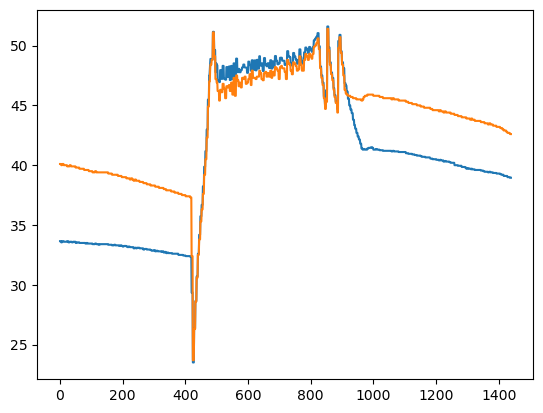

In [99]:
plt.plot(T_ch_hcws)
plt.plot(df_temp['T_ch1_hcws'].to_numpy())

In [100]:

df_temp['Q_chiller']=df_temp['i_ch_on']*df_temp['m_ch_hcw']*(df_temp['T_ch_hcwr']-df_temp['T_ch_hcws'])*4.184
df_temp['Q_ct']=df_temp['i_ct_on']*df_temp['m_ct_hcw']*(df_temp['T_ct_cwr']-df_temp['T_ct_cws'])*4.184

<Axes: xlabel='timestamp_local'>

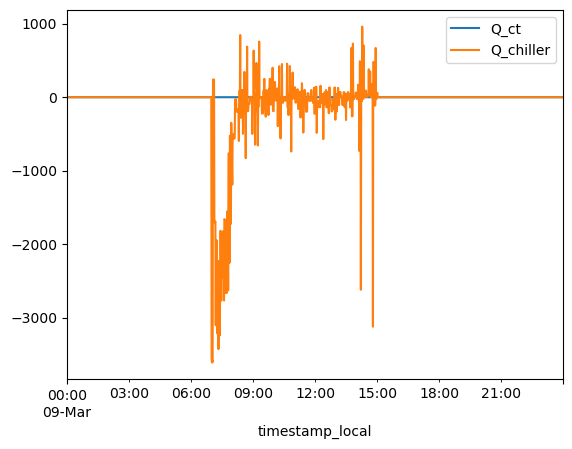

In [101]:
df_temp[['Q_ct','Q_chiller']].plot()

In [102]:
# 1 time
# 2 RH_oa => in_oa_RH_ahu
# 3 T_oa = > in_oa_temp_dry_C_ahu
# 4 T_ct_cws => in_condensor_supply_SP_C
# 5 T_ch_hcws => in_chilled_water_SP_C
# 6 m_ch_hcw => in_chilled_water_mass_flow_kgps
# 7 T_ch_hcwr => in_chilled_water_return_temp_C
# 8 i_ch_on => in_is_hvac_available

# *T_ch_hcws => out_chilled_water_supply_temp_C
# 9 m_ct_hcw => out_condensor_water_mass_flow_kgps
# 10 T_ct_cwr => out_condensor_water_return_temp_C
# 11 P_ch_gas => out_heat_m3s_chiller
# 12 P_ch_elec => out_power_kW_chiller
# 13 Q_chiller => out_load_kW_chiller
# 14 P_pump_chw => out_power_kW_chiller_pump
# 15 P_pump_cw => out_power_kW_condensor_pump
#

out_dat=df_temp[['time','RH_oa','T_oa','T_ct_cws','T_ch_hcws','m_ch_hcw','T_ch_hcwr','i_ch_on','m_ct_hcw','T_ct_cwr','P_ch_gas',
                 'P_ch_elec','Q_chiller','P_pump_chw','P_pump_cw']].interpolate().to_numpy()

In [103]:
sio.savemat("plant_summer.mat",{"csv":out_dat})